In [2]:
import csv
import os
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from pdfminer.high_level import extract_text

from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
nltk.download("stopwords")
import gensim
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.porter import PorterStemmer 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /Users/MYW/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Import all files

In [2]:
# import all files functions

def all_file(file_dir):
    df_file = pd.DataFrame(columns = ['label','name','dir'],dtype=np.object)
    
    for i in os.listdir(file_dir):
        if i != '.DS_Store':
            file_dir_name = file_dir+'/'+i
            l_name = os.listdir(file_dir_name)
        
            data_list = []
            for j in l_name:
                if j != '.DS_Store':
                    data_list.append([i,j,file_dir+'/'+i+'/'+j])
        
            df = pd.DataFrame(data = data_list,columns = ['label','name','dir'])
            df_file = pd.concat([df_file,df],axis = 0,ignore_index = True)
            
    return df_file


## 1.1 Import all files

In [3]:
files = all_file('/Users/MYW/Desktop/Assignment/Doc')
files

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


,label,name,dir
0,Payslips,Fair_Work_Pay_Slip_Template_(p).pdf,/Users/MYW/Desktop/Assignment/Doc/Payslips/Fai...
1,Payslips,Recap Paie WIREMIND 2018.pdf,/Users/MYW/Desktop/Assignment/Doc/Payslips/Rec...
2,Payslips,415450721-Payslip-Template.pdf,/Users/MYW/Desktop/Assignment/Doc/Payslips/415...
3,Payslips,Etat charges salariés BLINKSIGHT 2018.pdf,/Users/MYW/Desktop/Assignment/Doc/Payslips/Eta...
4,Payslips,Salary Slip.pdf,/Users/MYW/Desktop/Assignment/Doc/Payslips/Sal...
...,...,...,...
2407,NDA,e29c3877a103aaefcf77ebb110f981a5.pdf,/Users/MYW/Desktop/Assignment/Doc/NDA/e29c3877...
2408,NDA,9f7a97fa1d4912d6312d0a03277c24a8.pdf,/Users/MYW/Desktop/Assignment/Doc/NDA/9f7a97fa...
2409,NDA,2f3749e14385bf1eba71c61fdbc6f29f.pdf,/Users/MYW/Desktop/Assignment/Doc/NDA/2f3749e1...
2410,NDA,b5da72ae56119942c9c52c49d35d1bda.pdf,/Users/MYW/Desktop/Assignment/Doc/NDA/b5da72ae...


# 2. Text_preprocessing

In [4]:
def proprecess_text(text_dir):
    
    try:
        text_data = extract_text(text_dir)
        text_data = text_data.lower()# change into lowercase
    
        text_data  =str(np.char.replace(text_data, "’", "")) # replace"'" with "
        text_data  =str(np.char.replace(text_data, "'", ""))

        text_data = list(gensim.utils.tokenize(text_data)) #Cast this into a list

        stop_list = gensim.parsing.preprocessing.STOPWORDS   # load stopword and remove stopword
        text_stopremoved = [w for w in text_data if w not in stop_list] 

        from gensim.parsing.porter import PorterStemmer  # stemming
        stemmer = PorterStemmer()
        text_stemmed = [stemmer.stem(w) for w in text_stopremoved]

        text_data = [w for w in text_stemmed if len(w)>1] # remove single character
    
        return text_data
    
    except:
        return 'No text extract'

## 2.1 text_preprocessing apply to files

In [5]:
files['text'] = files['dir'].apply(proprecess_text)

/opt/anaconda3/lib/python3.7/site-packages/pdfminer/pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='/Users/MYW/Desktop/Assignment/Doc/RandomPDFs/Paper - How to write Shared Libraries.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)
/opt/anaconda3/lib/python3.7/site-packages/pdfminer/pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='/Users/MYW/Desktop/Assignment/Doc/RandomPDFs/Extra 300 - Pilot_s Operating Handbook (20th Sept, 2009).pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)
/opt/anaconda3/lib/python3.7/site-packages/pdfminer/pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='/Users/MYW/Desktop/Assignment

In [8]:
files

,label,name,dir,text
0,Payslips,Fair_Work_Pay_Slip_Template_(p).pdf,/Users/MYW/Desktop/Assignment/Doc/Payslips/Fai...,"[pai, slip, date, payment, pai, period, employ..."
1,Payslips,Recap Paie WIREMIND 2018.pdf,/Users/MYW/Desktop/Assignment/Doc/Payslips/Rec...,"[wiremind, rue, reuilli, pari, wiremind, recap..."
2,Payslips,415450721-Payslip-Template.pdf,/Users/MYW/Desktop/Assignment/Doc/Payslips/415...,"[perilwis, insur, broke, pvt, salari, payslip,..."
3,Payslips,Etat charges salariés BLINKSIGHT 2018.pdf,/Users/MYW/Desktop/Assignment/Doc/Payslips/Eta...,[]
4,Payslips,Salary Slip.pdf,/Users/MYW/Desktop/Assignment/Doc/Payslips/Sal...,"[form, rule, wage, slip, month, oct, golden, s..."
...,...,...,...,...
2407,NDA,e29c3877a103aaefcf77ebb110f981a5.pdf,/Users/MYW/Desktop/Assignment/Doc/NDA/e29c3877...,"[ex, dex, htm, form, non, competit, non, solic..."
2408,NDA,9f7a97fa1d4912d6312d0a03277c24a8.pdf,/Users/MYW/Desktop/Assignment/Doc/NDA/9f7a97fa...,"[ex, dex, htm, confidenti, non, solicit, propr..."
2409,NDA,2f3749e14385bf1eba71c61fdbc6f29f.pdf,/Users/MYW/Desktop/Assignment/Doc/NDA/2f3749e1...,"[exhibit, employe, confidenti, agreement, empl..."
2410,NDA,b5da72ae56119942c9c52c49d35d1bda.pdf,/Users/MYW/Desktop/Assignment/Doc/NDA/b5da72ae...,"[ex, dex, htm, mutual, non, disclosur, agreeme..."


## 2.2 Save the files as files_original.csv

In [19]:
output_path = '/Users/MYW/Desktop/Assignment/Doc/files_original.csv'
files.to_csv(output_path,sep=',',index=False,header=True)

In [9]:
# drop the row with 'No text extract'
files = files.drop(index = (files.loc[(files['text'] == 'No text extract')].index)).reset_index(drop = True)

# convert list_text to one string
files['text_string'] = files['text'].apply(' '.join)

# drop the row of empty cell of test_string
files = files.drop(index = (files.loc[(files['text_string'] == '')].index)).reset_index(drop = True)

# creat files with label and text_string
file = files[['label','text_string']]
file.head()

,label,text_string
0,Payslips,pai slip date payment pai period employe emplo...
1,Payslips,wiremind rue reuilli pari wiremind recappai ré...
2,Payslips,perilwis insur broke pvt salari payslip decemb...
3,Payslips,form rule wage slip month oct golden star faci...
4,Payslips,salari slip http myhr bsnl portal pai salarysl...


## 2.3 Save preprocessed files as files_preprocess.csv

In [9]:
output_path = '/Users/MYW/Desktop/ISS620 Data Science for Financial Services/Assignment/Doc/files_preprocess.csv'
file.to_csv(output_path,sep=',',index=False,header=True)

In [12]:
file

,label,text_string,label_id
0,Payslips,pai slip date payment pai period employe emplo...,0
1,Payslips,wiremind rue reuilli pari wiremind recappai ré...,0
2,Payslips,perilwis insur broke pvt salari payslip decemb...,0
3,Payslips,form rule wage slip month oct golden star faci...,0
4,Payslips,salari slip http myhr bsnl portal pai salarysl...,0
...,...,...,...
2334,NDA,ex dex htm form non competit non solicit confi...,5
2335,NDA,ex dex htm confidenti non solicit proprietari ...,5
2336,NDA,exhibit employe confidenti agreement employe c...,5
2337,NDA,ex dex htm mutual non disclosur agreement exhi...,5


# 3. Feature extraction with TFIDF

In [10]:
# Create a new column 'label_id' with encoded categories 
file['label_id'] = file['label'].factorize()[0]

# Dictionaries for label and id
label_to_id_df = file[['label', 'label_id']].drop_duplicates()
label_to_id = dict(label_to_id_df.values)
id_to_label = dict(label_to_id_df[['label_id','label']].values)


In [11]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2))

# We transform each text into a vector
features = tfidf.fit_transform(file.text_string).toarray()
labels = file.label_id

print("Each of the %d text is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 2339 text is represented by 449367 features (TF-IDF score of unigrams and bigrams)


In [12]:
# Finding the 400 most correlated terms with each of the paper categories
N = 400
for label, label_id in sorted(label_to_id.items()):
    features_chi2 = chi2(features, labels == label_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(label))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Addendums:
  * Most Correlated Unigrams are: terrac, memori, formaldehyd, anchorag, backfil, sleev, dpd, inst_id, sail, ventil, blank, majeur, summit, xlsx, panason, elev, settlement, bim, charlott, toilet, notar, amman, homeown, counti, invoic, ksu, cid, outdoor, deck, conform, apprenticeship, clearanc, transport, istanbul, deadlin, accru, flame, aoa, abat, sprinkler, heater, unicef, tank, redress, lobbi, preconstruct, home, kilometr, tha, seattl, landlord, licensur, beirut, debri, due, suspens, leas, technician, adhes, idaho, reconsider, drainag, reject, lif, folder, sdi, receipt, plumber, superintend, wastewat, protest, ceil, erect, offsit, adjust, dat, pvc, unesco, _________________________________, affix, rate, pmi, zip, gesellschaft, monument, redlin, camera, dewat, transcript, seismic, sanitari, foreclos, depart, corros, erm, mcgill, encroach, thick, evacu, flood, switchgear, vinyl, identif, exce, unforeseen, epoxi, project, confidenti, corridor, amort, vapor, staf, realti,


==> Endorsements:
  * Most Correlated Unigrams are: municip, shown, bespok, hourli, tpl, agent, ambassador, atmospher, lessen, demolit, creditor, indemnite, upheld, attach, thirti, viral, enrol, revis, gross, wil, wale, ceiv, logo, amidst, fra, school, abc, musician, tep, fume, lieu, transport, pan, moth, pant, ioniz, riot, riddl, hwy, gomez, fin, microchip, steve, tournament, entrant, pasadena, yearli, prejudic, daisi, resurfac, buri, atlanta, pai, hd, cip, ethnic, organis, websit, retent, bpm, dispar, basebal, falcon, wirelin, doe, nbc, polit, guidanc, payabl, pollut, sandra, pearl, stamp, campus, appoint, gov, angel, player, hartford, wallet, locksmith, crane, whichev, haul, season, ject, comeback, signifi, stolen, vacant, _______________, jimmi, patient, unauthoris, recoveri, carefulli, tru, ____________, health, stylist, baggag, payment, exclu, exclud, polic, npa, connor, sprinkler, beverag, name, expir, royalti, exp, anaheim, overtim, amend, ecp, swf, repair, poorest, unrecord, 


==> FinancialReports:
  * Most Correlated Unigrams are: oil, marketplac, airbu, fca, ernst, accumul, sector, demograph, bargain, treasur, kellogg, peso, arabia, healthi, saudi, polit, farm, deconsolid, truste, insignific, ftse, reward, health, premium, interseg, nasdaq, unremit, mortal, adjust, indonesia, vigor, crop, nol, briberi, forfeit, flow, terrorist, espp, expertis, underfund, empow, agil, inflationari, pariba, regularli, chair, zealand, webcast, cultiv, primarili, sponsor, hsbc, fulfil, quantit, retire, disast, amort, innov, healthcar, disposit, divers, mexico, donat, obsolesc, committe, accompani, capit, leader, plastic, unrest, amount, lti, statutori, noncurr, kpi, kong, citibank, commerc, predominantli, freight, devalu, america, russia, guarantor, econom, crise, payabl, classifi, issuer, launder, strateg, gmbh, margin, campaign, settl, provision, grower, asc, iasb, women, billion, outsourc, depositari, counterparti, annuiti, plaintiff, invest, multin, appetit, indefinit, in


==> NDA:
  * Most Correlated Unigrams are: look, lower, basic, deliveri, zero, constant, therewith, main, www, regard, invest, dissemin, refrain, kei, level, support, loop, approach, version, treatment, sharehold, courier, postag, civil, omiss, hash, reproduct, district, string, discoveri, element, ad, binari, prompt, path, low, al, librari, agenc, increas, valuabl, licens, recapit, fast, year, depend, divulg, firm, geograph, sentenc, paramet, connect, product, jointli, designe, circumst, recruit, acm, compar, expir, specif, execut, commonwealth, conduct, contrari, better, output, undersign, cooper, window, count, overnight, complex, acquisit, bond, adequ, author, random, confirm, show, counti, tree, certifi, tion, defin, nonpubl, integ, fullest, personnel, vector, concert, let, structur, pointer, alloc, check, processor, warrant, benefici, signatur, regulatori, small, user, voluntarili, purchas, brought, algorithm, embodi, recit, differ, core, log, add, node, pharmaceut, induc, simpl


==> Payslips:
  * Most Correlated Unigrams are: gal, sl, sandeep, apt, orang, supp, prev, bull, morin, payabl, hou, format, statutori, servant, sold, prakash, vidal, asterisk, comp, florian, rahul, anil, af, michel, apr, till, sami, ni, el, perth, cout, catherin, gr, felix, bac, margaret, union, christin, amazon, indi, amar, universiteit, pb, bruno, seif, pierr, cl, dl, attend, subscript, laurent, verma, vo, hor, jean, allow, shankar, pal, cabinet, mise, charg, ramesh, month, rama, leiden, arr, logiciel, midi, boulevard, medic, marion, payrol, mae, eur, male, bina, vijai, dia, refund, mishra, clerk, gomez, paid, won, hous, ssp, lav, fin, filet, travel, loi, staff, sex, chaudhri, br, compensatori, even, andb, drv, clair, claud, golden, conv, leav, labour, jori, basic, absenc, fund, bertrand, sunil, father, mehdi, rita, concess, broke, ranjan, lorrain, pablo, raj, yann, bene, impos, la, etienn, eva, portal, cumul, ag, pt, fernandez, dure, adop, dan, chef, grade, electrician, mohit, ee, 

# 4. Models to classify the paper

## 4.1 Split the train and test data set

In [13]:
X = file['text_string']
y = file['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,
                                                   random_state = 0)

## 4.2 Model build

In [14]:
models = [RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0)]

## 4.3 Cross-validation

In [27]:
CV = 6
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [28]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.917949
1,RandomForestClassifier,1,0.915385
2,RandomForestClassifier,2,0.912821
3,RandomForestClassifier,3,0.905128
4,RandomForestClassifier,4,0.917949
5,RandomForestClassifier,5,0.912596
6,LinearSVC,0,0.979487
7,LinearSVC,1,0.987179
8,LinearSVC,2,0.994872
9,LinearSVC,3,0.982051


## 4.4 Comparison of models performance

In [40]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']

# sort by accuracy
acc.sort_values(by=['Mean Accuracy'], axis=0 ,ascending=False, inplace=True)
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.987175,0.005615
LogisticRegression,0.957670,0.011344
RandomForestClassifier,0.913638,0.004783
MultinomialNB,0.906372,0.002624


# 5. Model Evaluation¶

In [15]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features,
                                                                               labels,
                                                                               file.index,
                                                                               test_size=0.3,
                                                                               random_state=1)

## 5.1 Hyper-turning (determining C value)

In [17]:
# determine the best C value
from sklearn.model_selection import GridSearchCV

model_turn = LinearSVC()
grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100]}
model_turn_cv = GridSearchCV(model_turn, grid, cv=5)
model_turn_cv.fit(X_train, y_train)

# Print hyperparameter
print("Tuned hyperparameter parameters: {}".format(model_turn_cv.best_params_)) 
print("Best cross-validation score: {}".format(model_turn_cv.best_score_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Tuned hyperparameter parameters: {'C': 10}
Best cross-validation score: 0.9877769075855897


In [18]:
print(model_turn)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


## 5.2 Cross-validation of LinearSVC

In [45]:
# Cross validation

model_1 = LinearSVC(C = 10)
accuracies_model_1 = cross_val_score(model, X=X_train, y=y_train, scoring='accuracy', cv=10)
print("LinearSVC Average accuracy: ", accuracies_model_1.mean())
print("LinearSVC Standard Deviation: ", accuracies_model_1.std())

LinearSVC Average accuracy:  0.9535612748765525
LinearSVC Standard Deviation:  0.007904202791465564


## 5.3 Using the best parameters to build

In [48]:
from sklearn.metrics import accuracy_score
model = LinearSVC(C = 10)
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)
   
accuracy1 = round(accuracy_score(y_train, y_train_predict), 5)
accuracy2 = round(accuracy_score(y_test, y_test_predict), 5)
print ('Optimized LinearSVC Training accuracy:', accuracy1)
print ('Optimized LinearSVC Testing accuracy:', accuracy2)


Optimized LinearSVC Training accuracy: 1.0
Optimized LinearSVC Testing accuracy: 0.98148


## 5.4 Save the model

In [52]:
import pickle
with open('model.pickle', 'wb') as file:
    pickle.dump(model, file)

## 5.5 Precision, Recall, F1-score

In [49]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_test_predict, 
                                    target_names= file['label'].unique()))

				CLASSIFICATIION METRICS

                  precision    recall  f1-score   support

        Payslips       1.00      1.00      1.00         6
      RandomPDFs       0.99      1.00      0.99       406
    Endorsements       1.00      0.50      0.67        18
       Addendums       0.92      0.90      0.91        40
FinancialReports       0.96      1.00      0.98        23
             NDA       0.99      1.00      0.99       209

        accuracy                           0.98       702
       macro avg       0.98      0.90      0.92       702
    weighted avg       0.98      0.98      0.98       702



## 5.6 Confusion Matrix

Confusion metrics :
 [[  6   0   0   0   0   0]
 [  0 406   0   0   0   0]
 [  0   2   9   3   1   3]
 [  0   4   0  36   0   0]
 [  0   0   0   0  23   0]
 [  0   0   0   0   0 209]]


Text(0.5, 1, 'Confusion Matrix - LinearSVC\n')

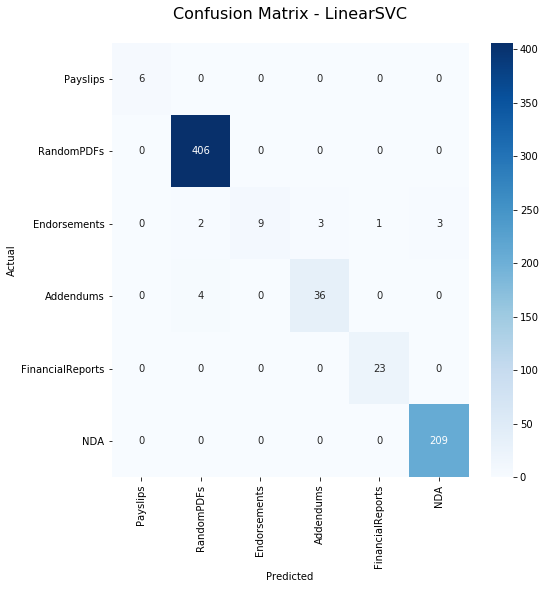

In [50]:
conf_mat = confusion_matrix(y_test, y_test_predict)
print('Confusion metrics :\n', conf_mat)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=label_to_id_df.label.values, 
            yticklabels=label_to_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix - LinearSVC\n", size=16)